In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('HousingData.csv')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


# Outlier Detection, Scaling and Normalization


Outliers can be detected by plotting simple distribution plots. 
For relatively small datasets, pairplots can be used to visualize columns having outliers
For larger sets of data, you can (1) Compute the z-score(research on it if you don't know) or use boolean indexing to determine outliers based on number of standard deviation that you may consider to be outliers(https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame):
Outlier Removal Techniques:
1. Normalizing using log-transforms (Also read about Box-Cox transforms, Yeo-Johnson transforms)
2. Dropping outliers altogether
3. Scaling your data

Text(0.5, 1.0, 'Normalized_Data')

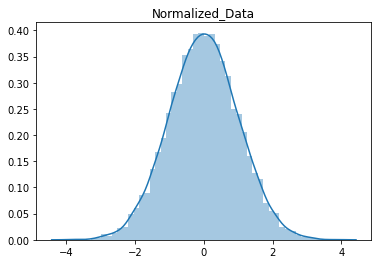

In [41]:
#Sample data
N = 10 ** 4
np.random.seed(42)
gaussian_data = np.random.normal(size=N)
skewed_data = np.random.lognormal(size=N)
sns.distplot(gaussian_data)
plt.title('Normalized_Data')

Text(0.5, 1.0, 'Lognormal Data')

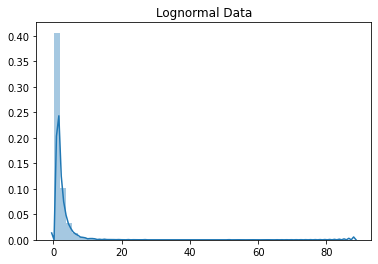

In [42]:
sns.distplot(skewed_data)
plt.title('Lognormal Data')

Text(0.5, 1.0, 'Log-transformed Data')

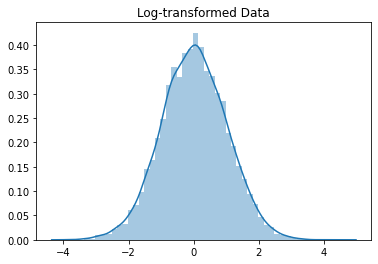

In [43]:
normalized_data = np.log(skewed_data)
sns.distplot(normalized_data)
plt.title('Log-transformed Data')

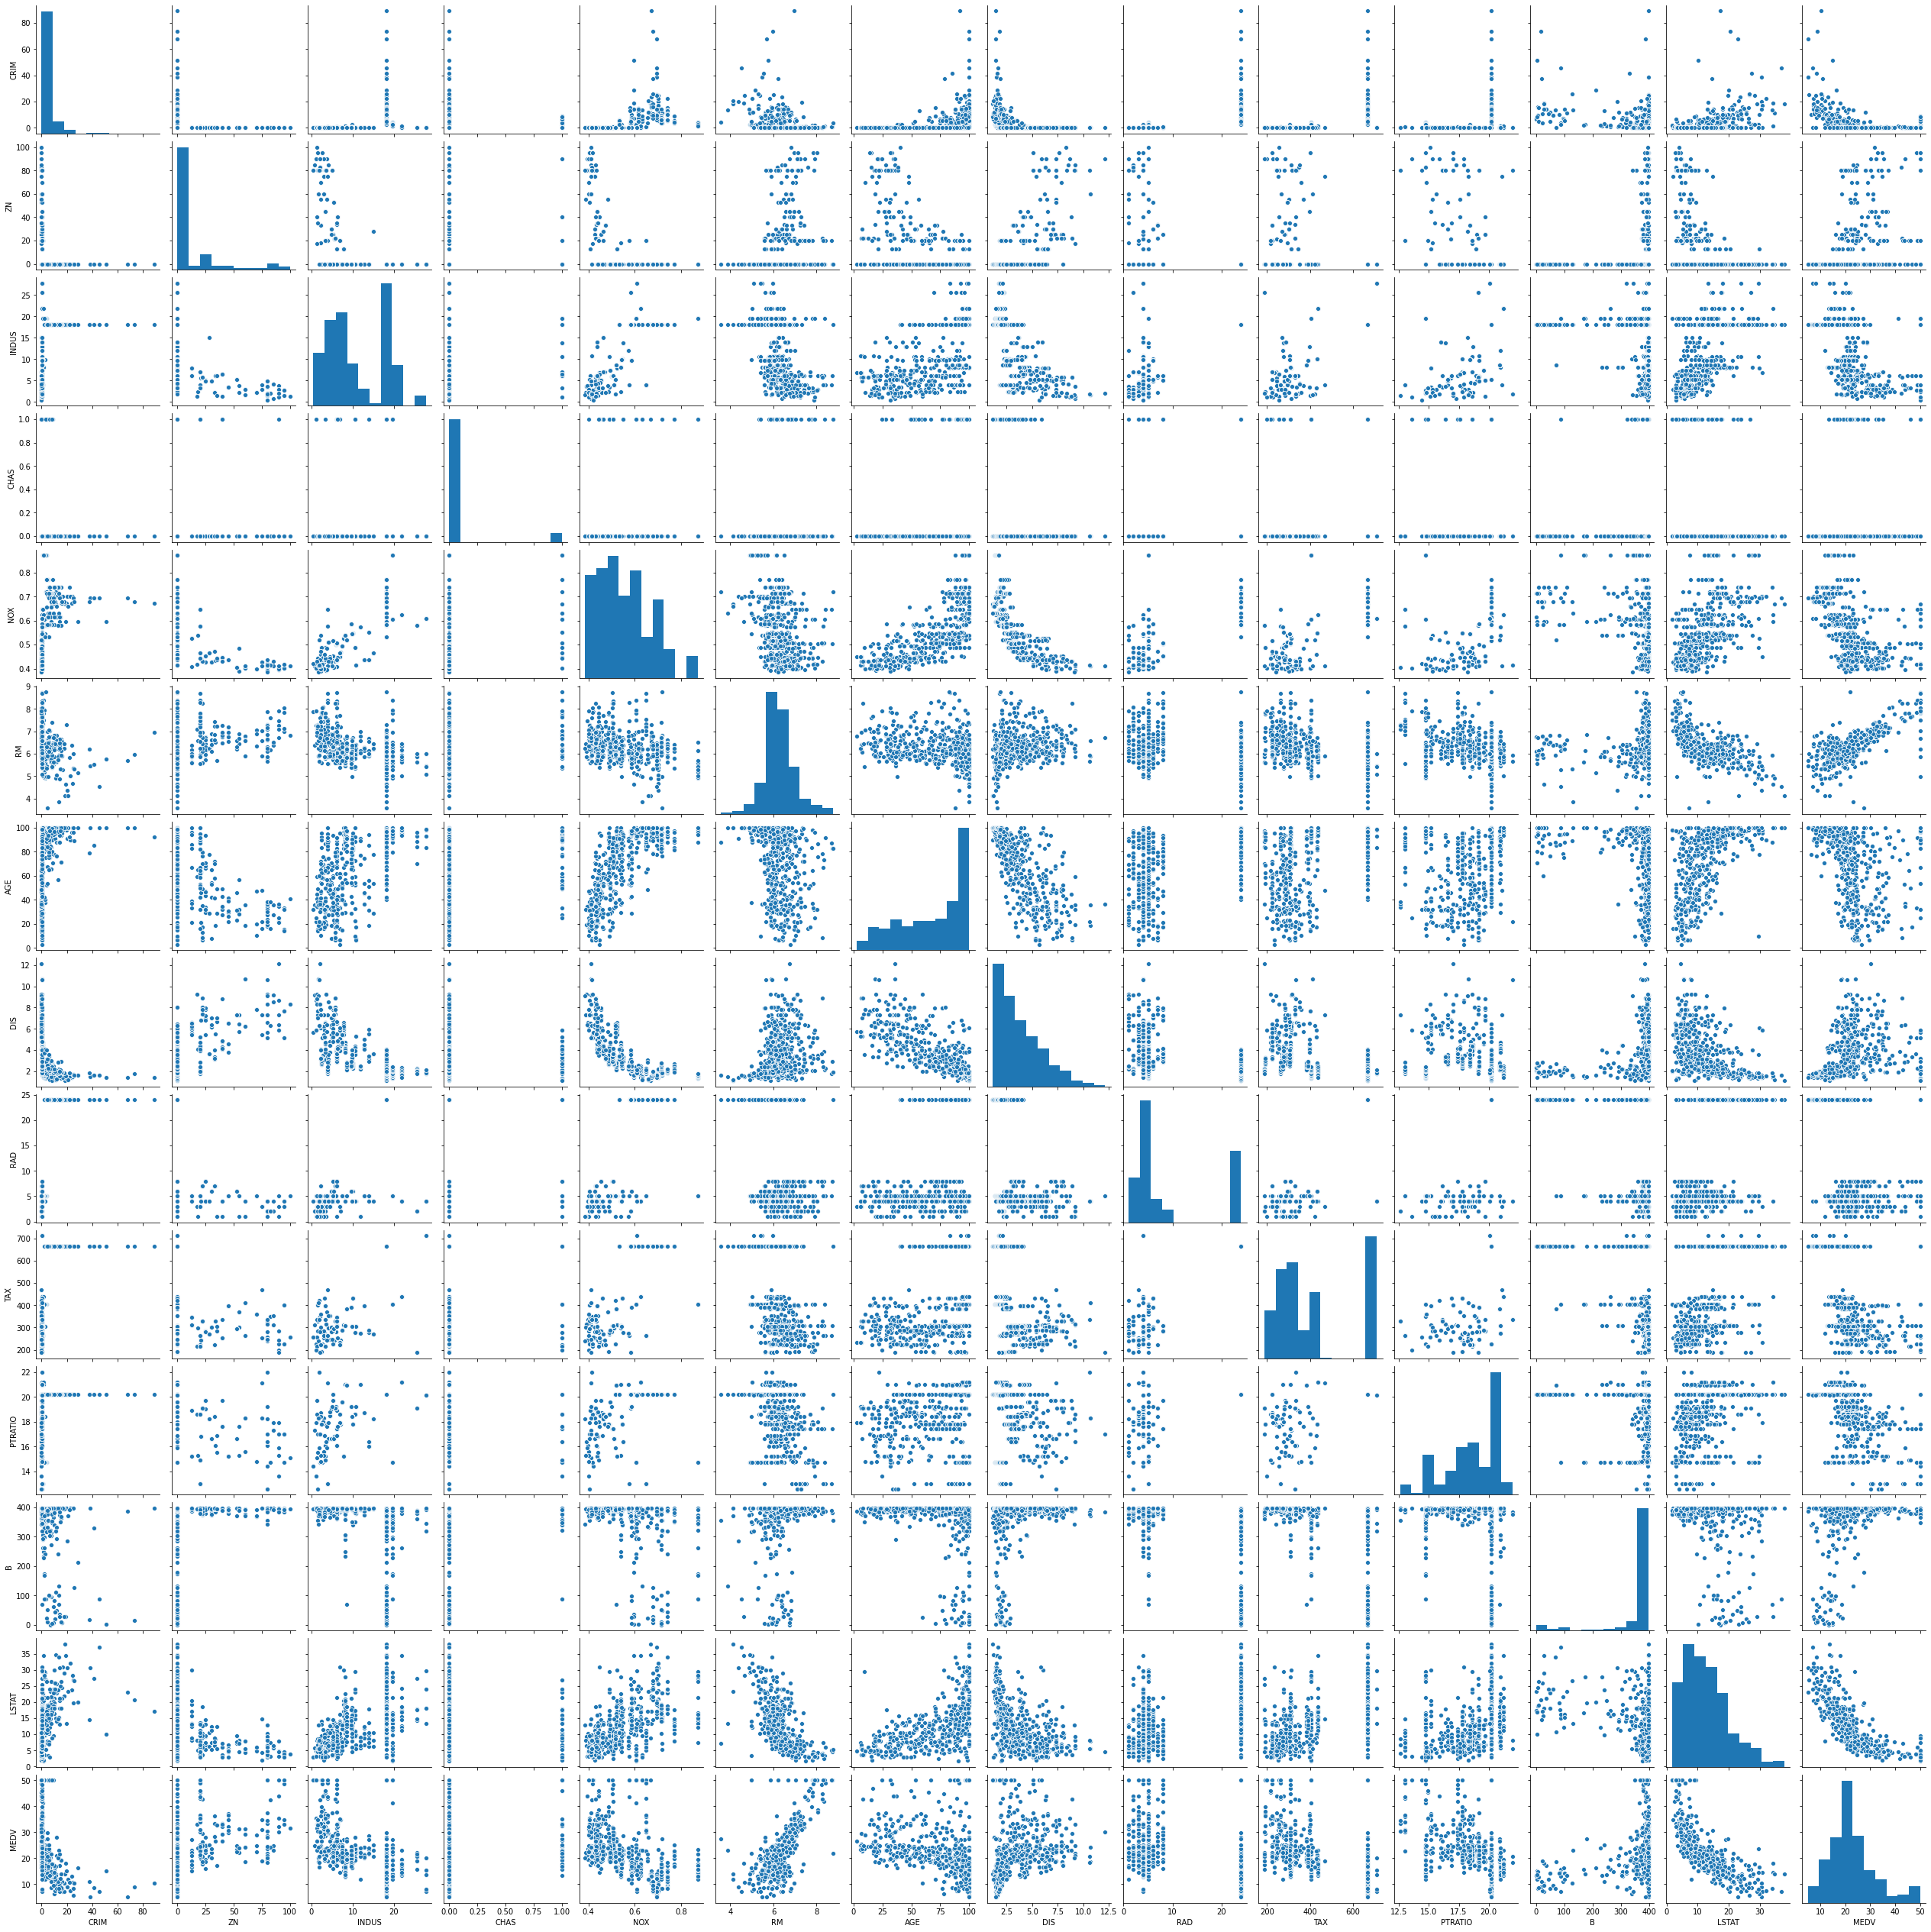

In [26]:
sns.pairplot(df)

Text(0.5, 1.0, 'Lstat distribution')

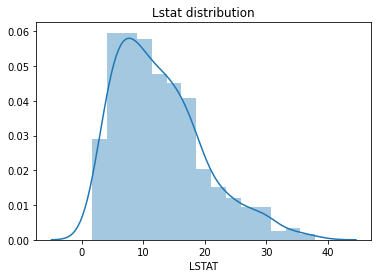

In [44]:
sns.distplot(df['LSTAT'])
plt.title('Lstat distribution')

Text(0.5, 1.0, 'Normalized LSTAT Distribution')

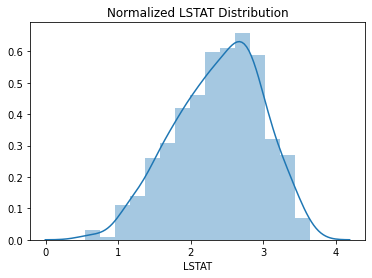

In [45]:
new_lstat = np.log(df['LSTAT'])
sns.distplot(new_lstat)
plt.title('Normalized LSTAT Distribution')

<AxesSubplot:xlabel='LSTAT'>

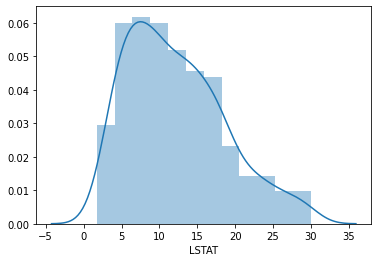

In [46]:
df_lstat_clean = df[df['LSTAT'] <= 30]
sns.distplot(df_lstat_clean['LSTAT'])

$ x_{scaled} = x - x_{min}/(x_{max}-x_{min}) $ 

In [55]:
zone = df['ZN']
np.min(zone), np.max(zone)

(0.0, 100.0)

In [57]:
def min_max_scaler(col):
    scaled_result = (col-np.min(col))/(np.max(col)-np.min(col))
    return scaled_result
scaled_zone = min_max_scaler(zone)
np.min(scaled_zone), np.max(scaled_zone)


(0.0, 1.0)

# Categorical Data Handling


### Categorical Data:
Data that falls into one of many categories:
Examples: Location, year, hour etc
May be either numeric or string: Numeric may include year, level, etc, string may include gender, qualification level etc. 
### Handling categorical data:
Basically handled by encoding the categories. 
Commonly used tools: get_dummies by pandas, One hot encoding and label encoding by sklearn. 
Frequency encoding is also widely used in cases where the categories are not consistent(for instance one category may be present in set A of data, maybe training data, and lack in set B, maybe testing data. 
Read more encoding techniques here: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02


In [58]:
no_missing_data = df.dropna()
no_missing_data.CHAS.unique()

array([0., 1.])

In [59]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [60]:
cat_column = ['CHAS']
#using pd.get_dummies
encoded_df = pd.get_dummies(data=no_missing_data, columns=cat_column)
encoded_df.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,1,0


In [61]:
#Frequency encoding
def frequency_encoding(df, col):
    fe = df.groupby(col).size()/len(df)
    df[col+"_encoded"] = df[col].map(fe)
    return df
freq_enc_df = frequency_encoding(no_missing_data, 'CHAS')
freq_enc_df.head(2)

/home/ningi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_encoded
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0,0.931472
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0.931472


In [62]:
freq_enc_df.CHAS_encoded.unique()

array([0.93147208, 0.06852792])

# Correlation Among Features

In [66]:
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


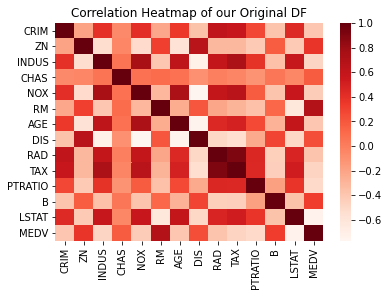

In [68]:
sns.heatmap(corr_matrix,  cmap=plt.cm.Reds)
plt.title('Correlation Heatmap of our Original DF')
plt.show()

We can use correlation values for feature selection. Here, we select all features whose correlation with the target variable is >0.5
For more information: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [70]:
#Correlation with output variable
cor_target = abs(corr_matrix["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.735822
MEDV       1.000000
Name: MEDV, dtype: float64

### In summary:
This is a basic introduction to data preprocessing and cleaning. 
Real world data is messy. Try finding some real world datasets and play with them to familiarize yourself with different preprocessing/cleaning techniques. 


![alt text](data_cleaning.jpg "Title")